In [1]:
import pandas as pd
import numpy as np


In [3]:
excel_data = pd.read_excel('../Datasets/flipkart_categories.xlsx')

dataframe = pd.DataFrame(excel_data)

In [4]:
dataframe.head()

,Category_1,Category_2,Category_3
0,"Sports, Books and More",Sports,Cricket
1,"Sports, Books and More",Sports,Badminton
2,"Sports, Books and More",Sports,Cycling
3,"Sports, Books and More",Sports,Football
4,"Sports, Books and More",Sports,Skating
5,"Sports, Books and More",Sports,Camping and Hiking
6,"Sports, Books and More",Sports,Swimming
7,"Sports, Books and More",Exercise Fitness,Cardio Equipment
8,"Sports, Books and More",Exercise Fitness,Home Gyms
9,"Sports, Books and More",Exercise Fitness,Support


In [7]:
dataframe.tail()

,Category_1,Category_2,Category_3
312,Home and Furniture,Home Lighting,Emergency Lights
313,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts
314,Home and Furniture,Pet Supplies,Dogs
315,Home and Furniture,Pet Supplies,Cats
316,Home and Furniture,Pet Supplies,Fish and Aquatics


In [8]:
dataframe.isnull().sum()

Category_1    0
Category_2    0
Category_3    0
dtype: int64

In [12]:
dataframe.shape

(317, 3)

In [13]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()

dataframe['Category_1'] = Le.fit_transform(dataframe['Category_1']) 
dataframe

,Category_1,Category_2,Category_3
0,4,Sports,Cricket
1,4,Sports,Badminton
2,4,Sports,Cycling
3,4,Sports,Football
4,4,Sports,Skating
...,...,...,...
312,2,Home Lighting,Emergency Lights
313,2,Festive Decor and Gifts,Festive Decor and Gifts
314,2,Pet Supplies,Dogs
315,2,Pet Supplies,Cats


In [29]:
dataframe['Category_2'] = Le.fit_transform(dataframe['Category_2'])
dataframe['Category_3'] = Le.fit_transform(dataframe['Category_3'])

In [30]:
dataframe

,Category_1,Category_2,Category_3
0,4,64,69
1,4,64,20
2,4,64,72
3,4,64,111
4,4,64,236
...,...,...,...
312,2,37,94
313,2,23,104
314,2,58,85
315,2,58,56


In [34]:
pd.Series(dataframe['Category_1'])

0      4
1      4
2      4
3      4
4      4
      ..
312    2
313    2
314    2
315    2
316    2
Name: Category_1, Length: 317, dtype: int64

In [35]:
Le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76], dtype=int64)

In [36]:
dataframe['Category_1'].unique()

array([4, 1, 3, 5, 0, 2], dtype=int64)

In [17]:
X = dataframe.iloc[:,1:]
y = dataframe.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (253, 2)
X_test:  (64, 2)
y_train:  (253,)
y_test:  (64,)


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion= 'entropy')
model = dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
y_pred

array([1, 2, 4, 0, 4, 3, 5, 3, 1, 5, 0, 1, 3, 5, 0, 3, 3, 3, 2, 0, 3, 5,
       3, 5, 4, 5, 2, 4, 5, 5, 3, 4, 5, 0, 2, 1, 5, 5, 5, 5, 4, 5, 2, 2,
       2, 4, 3, 0, 0, 1, 1, 0, 3, 2, 4, 3, 3, 1, 4, 0, 0, 2, 3, 3])

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f'Accuracy: {acc*100}')

Accuracy: 76.5625


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

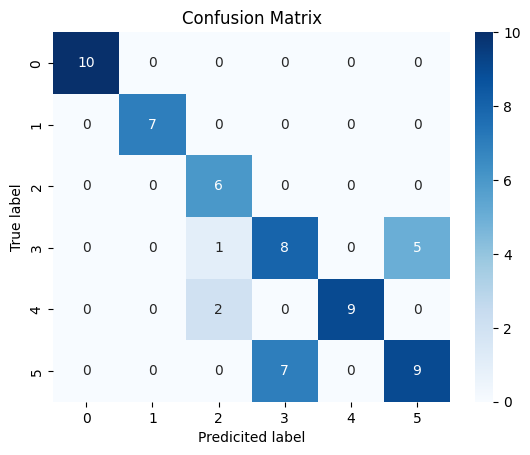

In [26]:
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicited label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
